# **Dataset Overview**

The dataset provides detailed information about employees within an anonymous company, covering aspects such as educational background, demographics, work history, and employment-related factors. It has been anonymized to protect the privacy of individuals while maintaining the value of the data for analysis. The dataset could be used to explore workforce diversity, employee retention, or patterns related to employee experience and job stability.

Number of Observations and Variables:
- Total Observations: 4,653 employees
- Total Variables: 9

### **Detailed Variable Descriptions**

| **Variable Name**           | **Description**                                                          | **Type**         | **Example Values**        |
|-----------------------------|---------------------------------------------------------------------------|-----------------|---------------------------|
| `Education`                 | Educational qualifications (degree, field of study, etc.)                | Categorical     | "Bachelors"        |
| `Joining Year`              | Year the employee joined the company                                     | Numerical       | 2015, 2018                |
| `City`                      | Location where the employee works                                        | Categorical     | "New Delhi", "Pune"     |
| `Payment Tier`              | Employee’s salary tier (categorization of income levels)                 | Ordinal         | 1, 2, 3                   |
| `Age`                       | Age of the employee                                                      | Numerical       | 25, 34, 42                |
| `Gender`                    | Employee’s gender identity                                               | Categorical     | "Male", "Female", "Other" |
| `Ever Benched`              | Whether the employee was temporarily without assigned work               | Binary          | "Yes", "No"               |
| `Experience in Current Domain` | Number of years the employee has worked in their current field      | Numerical       | 2, 5, 10                  |
| `Leave or Not` (Target)     | Indicates if the employee left the company (attrition)                   | Binary          | 0 (No), 1 (Yes)           |


Data Distribution and Summary Statistics:
- Education: The majority of employees have a Bachelor’s degree (3,601), followed by Master’s (873) and PhD (179) qualifications.
- Joining Year: Employees joined between 2012 and 2018, with a median joining year of 2015.
- City: The largest number of employees are from Bangalore (2,228), followed by Pune (1,268) and New Delhi (1,157).
- Payment Tier: Payment tiers are distributed as 1 (243 employees), 2 (918 employees), and 3 (3,492 employees).
- Age: The age range of employees is from 22 to 41 years, with a mean age of approximately 29.4 years.
- Gender: The dataset includes 1,875 female and 2,778 male employees.
- Ever Benched: Most employees have not been benched (4,175), while 478 have experienced benching.
- Experience in Current Domain: The experience ranges from 0 to 7 years, with a mean of approximately 2.9 years.
- Leave or Not: 1,600 employees have left the company, while 3,053 have remained.

In [51]:
# Loading Libraries

library(broom)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(MASS)
library(caret)
library(pROC)
library(glmnet)

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-8



## Research Question

What factors contribute to predicting whether an employee will leave the company or not?

### Response and Explanatory Variables

 - Response (Dependent) Variable: Leave or Not (Binary: 0 = No, 1 = Yes).
 - Explanatory (Independent) Variable: The remaining variables in the dataset to explore potential predictors.

### How the Data Helps Address the Question
The dataset contains relevant information on employees' demographics, work conditions, and experiences, which can be analyzed to:

 - Identify key predictors of attrition (e.g., Payment Tier, Ever Benched, Experience in Current Domain).
 - Determine how factors such as Age, Gender, or Education relate to employee retention.
 - Use statistical models like logistic regression or ANOVA to predict the likelihood of attrition.

### Prediction or Inference?
This question focuses on prediction, aiming to build a model that accurately forecasts whether an employee will leave based on their characteristics. However, insights from the analysis can also infer trends and patterns in employee turnover, which can guide management strategies.

## Exploratory Data Analysis

Read the dataset

In [2]:
employee_data <- read.csv("data/Employee.csv")

head(employee_data)
tail(employee_data)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>
1,Bachelors,2017,Bangalore,3,34,Male,No,0,0
2,Bachelors,2013,Pune,1,28,Female,No,3,1
3,Bachelors,2014,New Delhi,3,38,Female,No,2,0
4,Masters,2016,Bangalore,3,27,Male,No,5,1
5,Masters,2017,Pune,3,24,Male,Yes,2,1
6,Bachelors,2016,Bangalore,3,22,Male,No,0,0


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>
4648,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4650,Masters,2013,Pune,2,37,Male,No,2,1
4651,Masters,2018,New Delhi,3,27,Male,No,5,1
4652,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4653,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


Check the packaging

In [3]:
str(employee_data)

'data.frame':	4653 obs. of  9 variables:
 $ Education                : chr  "Bachelors" "Bachelors" "Bachelors" "Masters" ...
 $ JoiningYear              : int  2017 2013 2014 2016 2017 2016 2015 2016 2016 2017 ...
 $ City                     : chr  "Bangalore" "Pune" "New Delhi" "Bangalore" ...
 $ PaymentTier              : int  3 1 3 3 3 3 3 3 3 2 ...
 $ Age                      : int  34 28 38 27 24 22 38 34 23 37 ...
 $ Gender                   : chr  "Male" "Female" "Female" "Male" ...
 $ EverBenched              : chr  "No" "No" "No" "No" ...
 $ ExperienceInCurrentDomain: int  0 3 2 5 2 0 0 2 1 2 ...
 $ LeaveOrNot               : int  0 1 0 1 1 0 0 1 0 0 ...


Identify missing values

In [4]:
colSums(is.na(employee_data))

Education               JoiningYear                      City 
                        0                         0                         0 
              PaymentTier                       Age                    Gender 
                        0                         0                         0 
              EverBenched ExperienceInCurrentDomain                LeaveOrNot 
                        0                         0                         0

Rename columns for readability

In [5]:
employee_data <- employee_data %>%
  rename(
    Experience = `ExperienceInCurrentDomain`,
    Left = `LeaveOrNot`
  )

Convert categorical variables to factors

In [6]:
employee_data <- employee_data %>%
  mutate(
    Education = as.factor(Education),
    Gender = as.factor(Gender),
    City = as.factor(City),
    PaymentTier = factor(`PaymentTier`, levels = c(1, 2, 3), ordered = TRUE),
    EverBenched = as.factor(EverBenched),
    Left = as.factor(Left)
  )

In [7]:
head(employee_data)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,Experience,Left
,<fct>,<int>,<fct>,<ord>,<int>,<fct>,<fct>,<int>,<fct>
1,Bachelors,2017,Bangalore,3,34,Male,No,0,0
2,Bachelors,2013,Pune,1,28,Female,No,3,1
3,Bachelors,2014,New Delhi,3,38,Female,No,2,0
4,Masters,2016,Bangalore,3,27,Male,No,5,1
5,Masters,2017,Pune,3,24,Male,Yes,2,1
6,Bachelors,2016,Bangalore,3,22,Male,No,0,0


Get summary statistics

In [8]:
summary(employee_data)

     Education     JoiningYear          City      PaymentTier      Age       
 Bachelors:3601   Min.   :2012   Bangalore:2228   1: 243      Min.   :22.00  
 Masters  : 873   1st Qu.:2013   New Delhi:1157   2: 918      1st Qu.:26.00  
 PHD      : 179   Median :2015   Pune     :1268   3:3492      Median :28.00  
                  Mean   :2015                                Mean   :29.39  
                  3rd Qu.:2017                                3rd Qu.:32.00  
                  Max.   :2018                                Max.   :41.00  
    Gender     EverBenched   Experience    Left    
 Female:1875   No :4175    Min.   :0.000   0:3053  
 Male  :2778   Yes: 478    1st Qu.:2.000   1:1600  
                           Median :3.000           
                           Mean   :2.906           
                           3rd Qu.:4.000           
                           Max.   :7.000           

In [9]:
experience_summary <- employee_data %>%
  group_by(PaymentTier) %>%
  summarise(
    Mean_Experience = mean(Experience, na.rm = TRUE),
    Median_Experience = median(Experience, na.rm = TRUE),
    SD_Experience = sd(Experience, na.rm = TRUE),
    Min_Experience = min(Experience, na.rm = TRUE),
    Max_Experience = max(Experience, na.rm = TRUE),
    Count = n()
  )
experience_summary

PaymentTier,Mean_Experience,Median_Experience,SD_Experience,Min_Experience,Max_Experience,Count
<ord>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,2.761317,3,1.644118,0,7,243
2,2.900871,3,1.514013,0,7,918
3,2.916953,3,1.563505,0,7,3492


Save the Cleaned Data

In [10]:
write_csv(employee_data, "data/cleaned_employee_data.csv")

In [11]:
glimpse(employee_data)

Rows: 4,653
Columns: 9
$ Education   <fct> Bachelors, Bachelors, Bachelors, Masters, Masters, Bachelo…
$ JoiningYear <int> 2017, 2013, 2014, 2016, 2017, 2016, 2015, 2016, 2016, 2017…
$ City        <fct> Bangalore, Pune, New Delhi, Bangalore, Pune, Bangalore, Ne…
$ PaymentTier <ord> 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 2…
$ Age         <int> 34, 28, 38, 27, 24, 22, 38, 34, 23, 37, 27, 34, 32, 39, 37…
$ Gender      <fct> Male, Female, Female, Male, Male, Male, Male, Female, Male…
$ EverBenched <fct> No, No, No, No, Yes, No, No, No, No, No, No, No, Yes, No, …
$ Experience  <int> 0, 3, 2, 5, 2, 0, 0, 2, 1, 2, 5, 3, 5, 2, 4, 3, 2, 4, 0, 0…
$ Left        <fct> 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1…


## Proposed Visualizations

#### Bar Chart of 'Left' by Payment Tier

Displays attrition trends across payment tiers.

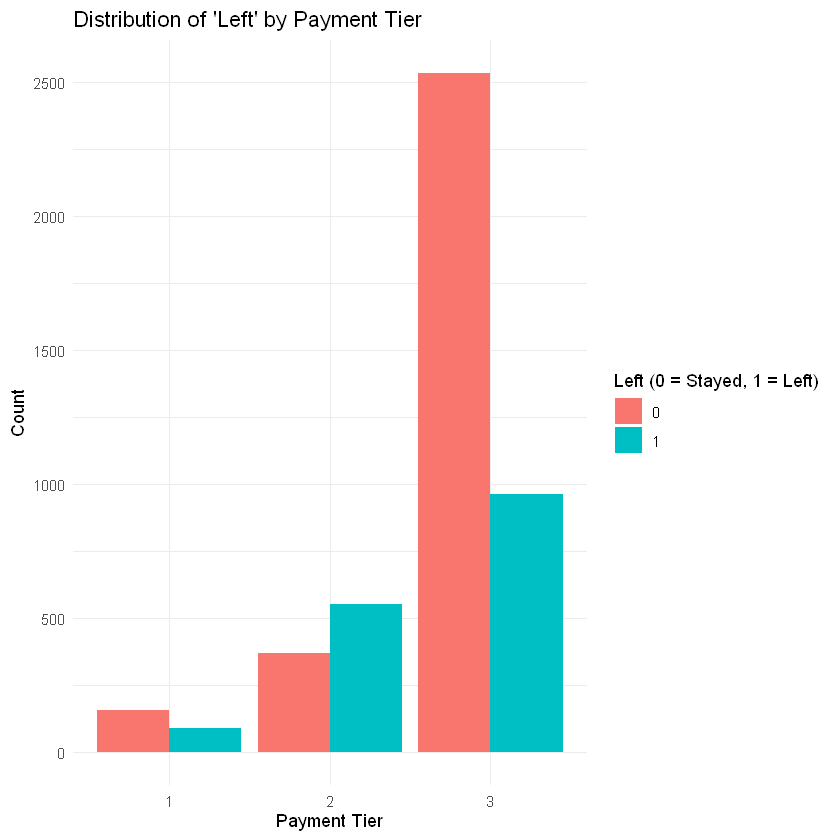

In [12]:
ggplot(employee_data, aes(x = PaymentTier, fill = Left)) +
  geom_bar(position = "dodge") +
  labs(title = "Distribution of 'Left' by Payment Tier",
       x = "Payment Tier", y = "Count", fill = "Left (0 = Stayed, 1 = Left)") +
  theme_minimal()

#### Bar Chart of 'Left' by Education

Shows how education level impacts attrition.

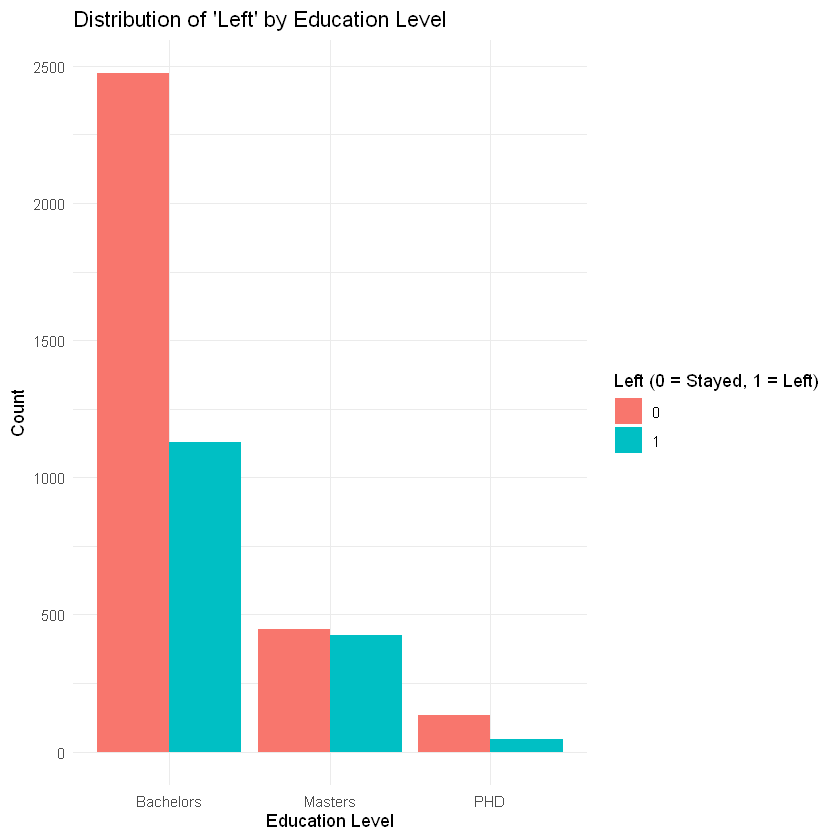

In [13]:
ggplot(employee_data, aes(x = Education, fill = Left)) +
  geom_bar(position = "dodge") +
  labs(title = "Distribution of 'Left' by Education Level",
       x = "Education Level", y = "Count", fill = "Left (0 = Stayed, 1 = Left)") +
  theme_minimal()

#### Boxplot of Experience by 'Left'

Highlights differences in years of experience between employees who stayed and those who left.

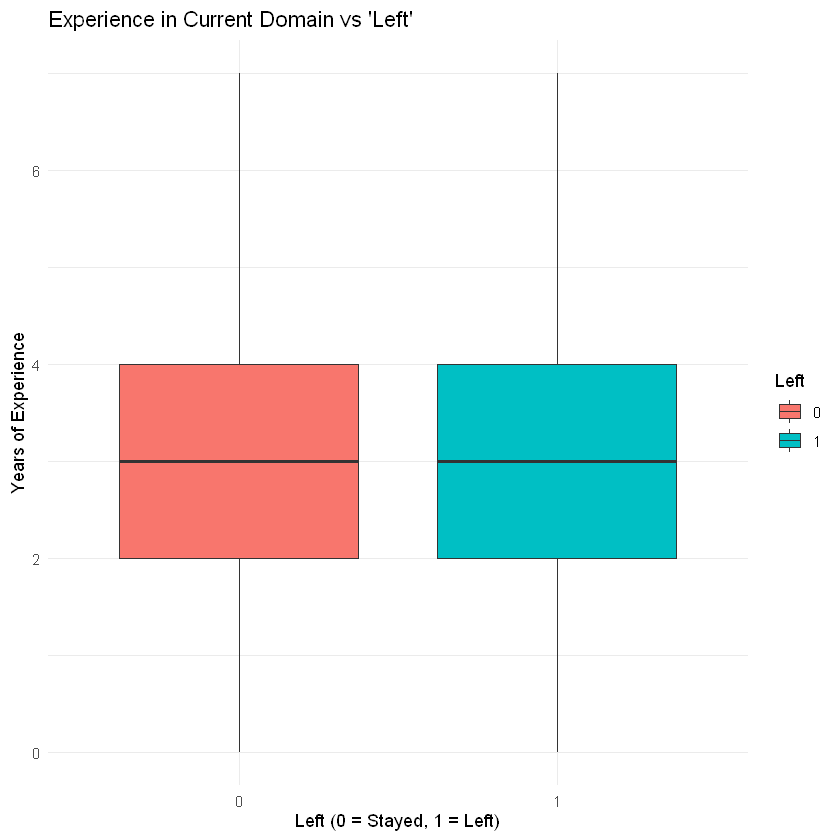

In [14]:
ggplot(employee_data, aes(x = Left, y = Experience, fill = Left)) +
  geom_boxplot() +
  labs(title = "Experience in Current Domain vs 'Left'",
       x = "Left (0 = Stayed, 1 = Left)", y = "Years of Experience") +
  theme_minimal()

## Methods and Plan Explanation

The goal of this project is to predict employee attrition using a logistic regression model with Lasso regularization (L1 penalty).

#### Why this Method is Appropriate

Lasso Regression will be used to predict employee attrition because it combines feature selection and model regularization. Lasso uses L1 regularization, which reduces less important coefficients to zero, effectively eliminating irrelevant predictors. This is especially effective for datasets with multiple predictors since it simplifies the model and lowers the likelihood of overfitting. Lasso also handles multicollinearity by penalizing correlated predictors, making it perfect for this dataset, which includes numerical, ordinal, and categorical data.

The dataset has 4,653 observations, which are adequate for Lasso to discover meaningful patterns. Furthermore, we will use logistic regression to handle the binary response variable ('Leave or Not'). Cross-validation will be used to find the best penalty parameter (lambda). This ensures that the model generalizes well to unseen data.

#### Assumptions Required

- Linear Relationship: Lasso assumes a linear relationship between predictors and the log-odds of the target variable.
- No Perfect Multicollinearity: Lasso assumes no perfect multicollinearity between the predictors.
- Independent Errors: Residuals are assumed to be independent and normally distributed.
- Sufficient Sample Size: Lasso requires an adequate sample size for effective variable selection.

#### Plan for Implementation

- The dataset will be first split into 70% training and 30% testing subsets to assess model performance.
- Predictors are transformed into a matrix format and a Lasso logistic regression model will be trained using cross-validation to identify the optimal lambda.
- The model will be evaluated on the test set using metrics such as accuracy, sensitivity, specificity, ROC and AUC.

#### Potential Limitations or Weaknesses

- Class Imbalance: The dataset demonstrates a class imbalance, with more employees staying than leaving. This can bias the model toward predicting the majority class. Addressing this imbalance through class weights or resampling techniques could improve results.
- Threshold Sensitivity: The default classification threshold (0.5) may not optimize for both sensitivity and specificity. Adjusting the threshold to balance these metrics, depending on our needs, could enhance the model’s utility.
- Loss of Non-Linear Interactions: Lasso does not account for non-linear relationships or interactions unless explicitly included in the model. Important interactions, such as between Experience and Payment Tier, might remain unexplored.

## Implementation of a proposed model

#### Split the Data into training set and testing set

Divide the dataset into training and testing subsets.

In [37]:
set.seed(123)

trainIndex <- createDataPartition(employee_data$Left, p = 0.7, list = FALSE)
trainData <- employee_data[trainIndex, ]  # Training data (70%)
testData <- employee_data[-trainIndex, ] # Testing data (30%)

head(trainData)
nrow(trainData)

head(testData)
nrow(testData)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,Experience,Left
,<fct>,<int>,<fct>,<ord>,<int>,<fct>,<fct>,<int>,<fct>
1,Bachelors,2017,Bangalore,3,34,Male,No,0,0
2,Bachelors,2013,Pune,1,28,Female,No,3,1
3,Bachelors,2014,New Delhi,3,38,Female,No,2,0
4,Masters,2016,Bangalore,3,27,Male,No,5,1
5,Masters,2017,Pune,3,24,Male,Yes,2,1
7,Bachelors,2015,New Delhi,3,38,Male,No,0,0


[1] 3258

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,Experience,Left
,<fct>,<int>,<fct>,<ord>,<int>,<fct>,<fct>,<int>,<fct>
6,Bachelors,2016,Bangalore,3,22,Male,No,0,0
10,Masters,2017,New Delhi,2,37,Male,No,2,0
13,Bachelors,2018,Pune,3,32,Male,Yes,5,1
20,Bachelors,2016,New Delhi,2,22,Female,No,0,1
23,Bachelors,2017,New Delhi,2,36,Male,No,3,0
29,Bachelors,2013,Pune,2,31,Female,No,2,1


[1] 1395

#### Build logistic regression model using LASSO regression

In [56]:
# Convert predictors to matrix and response to numeric
X <- model.matrix(Left ~ ., data = trainData)[, -1]
y <- as.numeric(as.character(trainData$Left))

# Lasso regression
lasso_model <- cv.glmnet(X, y, alpha = 1, family = "binomial")
best_lambda_lasso <- lasso_model$lambda.min
best_lambda_lasso

[1] 0.0009825358

In [57]:
# Coefficients for Lasso
coef(lasso_model, s = best_lambda_lasso)

12 x 1 sparse Matrix of class "dgCMatrix"
                            s1
(Intercept)      -339.80590541
EducationMasters    0.80207581
EducationPHD        0.21382954
JoiningYear         0.16893209
CityNew Delhi      -0.60055176
CityPune            0.58930939
PaymentTier.L      -0.15862726
PaymentTier.Q      -0.51597403
Age                -0.02574608
GenderMale         -0.81209395
EverBenchedYes      0.66186372
Experience         -0.05942688

#### Predict on test data

In [59]:
X_test <- model.matrix(Left ~ ., data = testData)[, -1]
lasso_preds <- predict(lasso_model, s = best_lambda_lasso, newx = X_test, type = "response")
lasso_classes <- ifelse(lasso_preds > 0.5, 1, 0)

conf_matrix <- confusionMatrix(as.factor(lasso_classes), testData$Left)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 825 281
         1  90 199
                                        
               Accuracy : 0.7341        
                 95% CI : (0.71, 0.7571)
    No Information Rate : 0.6559        
    P-Value [Acc > NIR] : 2.164e-10     
                                        
                  Kappa : 0.3493        
                                        
 Mcnemar's Test P-Value : < 2.2e-16     
                                        
            Sensitivity : 0.9016        
            Specificity : 0.4146        
         Pos Pred Value : 0.7459        
         Neg Pred Value : 0.6886        
             Prevalence : 0.6559        
         Detection Rate : 0.5914        
   Detection Prevalence : 0.7928        
      Balanced Accuracy : 0.6581        
                                        
       'Positive' Class : 0             
                                        

#### ROC and AUC

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 0.744817850637523"


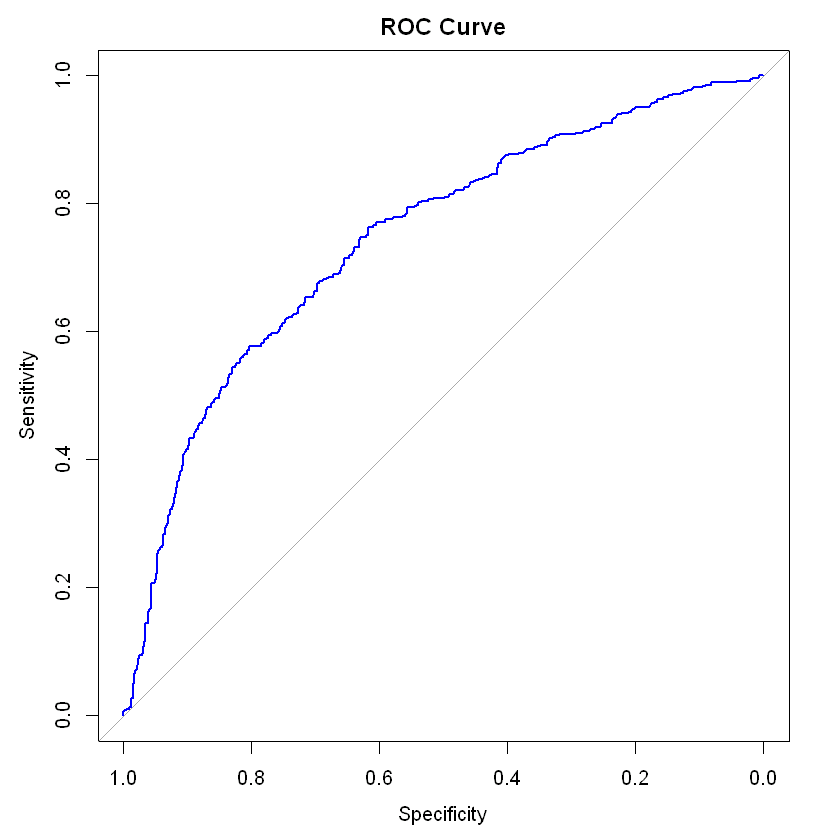

In [60]:
roc_curve <- roc(testData$`Left`, predicted_probs)
plot(roc_curve, col = "blue", main = "ROC Curve")
auc_value <- auc(roc_curve)
print(paste("AUC:", auc_value))

In [61]:
exp(coef(model))

(Intercept) EducationMasters     EducationPHD      JoiningYear 
   5.608210e-151     2.285810e+00     1.295367e+00     1.187702e+00 
   CityNew Delhi         CityPune    PaymentTier.L    PaymentTier.Q 
    5.320580e-01     1.805260e+00     8.489400e-01     5.936260e-01 
             Age       GenderMale   EverBenchedYes       Experience 
    9.731977e-01     4.375817e-01     1.975221e+00     9.384410e-01

## Interpretation of the Results

The Lasso regression model achieved an AUC score of 0.7448, indicating moderate discriminatory power, with high sensitivity (90.16%) for predicting employees who stay but low specificity (41.46%) for identifying those who leave. While the model performs well in retention predictions, it struggles with accurately identifying potential attrition cases, likely due to class imbalance. The ROC curve suggests room for improvement by optimizing the classification threshold to balance sensitivity and specificity. Overall, the model offers actionable insights into employee retention but requires refinement to better predict attrition.